In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as mpatches

In [221]:
city_data = os.path.join('Resources', 'city_data.csv')
city_df = pd.read_csv(city_data, encoding="utf-8")
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [222]:
ride_data = os.path.join('Resources', 'ride_data.csv')
ride_df = pd.read_csv(ride_data, encoding="utf-8")
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [223]:
city_and_ride_df = pd.merge(city_df, ride_df, on="city", how="outer")
city_and_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [233]:
city_group = city_and_ride_df.groupby('city')
avg_fare = city_group['fare'].mean()
number_rides = city_group['ride_id'].count()
drivers_city = city_group['driver_count'].unique().map(lambda x: x[0])
city_type = city_group['type'].unique().map(lambda x: x[0])

colors = []
for i, type in city_type.iteritems():
    if type == "Urban":
        colors.append("Gold")
    elif type == "Suburban":
        colors.append("Lightskyblue")
    elif type == "Rural":
        colors.append("Lightcoral")
    else:
        colors.append("Black")   
        
city_types = ['Urban','Suburban','Rural']
city_types_colors = ['Gold','Lightskyblue','Lightcoral']
recs = []
for i in range(0,len(city_types_colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=city_types_colors[i]))

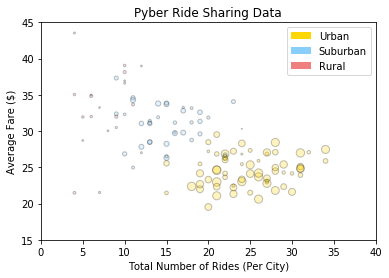

In [228]:
plt.scatter(number_rides, avg_fare, marker='o', 
            sizes=drivers_city, alpha=0.25, edgecolors="black",
            c=colors)

plt.xlim(0, 40)
plt.ylim(15, 45)

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")

plt.legend(recs, city_types ,loc="best")  

plt.show()

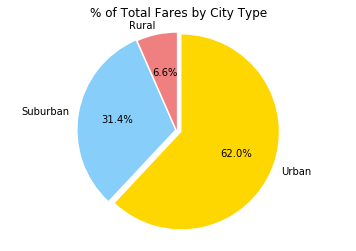

In [304]:
city_type_group = city_and_ride_df.groupby('type')
colors = ['Lightcoral','Lightskyblue', 'Gold']
explode = [0, 0.02, 0.05]

count_fare = city_type_group['fare'].sum()
plt.title("% of Total Fares by City Type")
plt.pie(count_fare, explode=explode, labels=count_fare.keys(), 
        colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

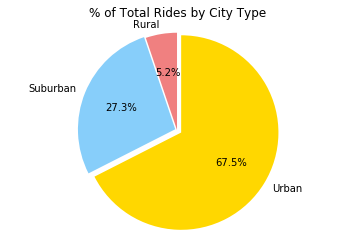

In [305]:
#% of Total Rides by City Type
count_rides = city_type_group['ride_id'].count()

plt.title("% of Total Rides by City Type")
plt.pie(count_rides, explode=explode, labels=count_rides.keys(), 
        colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

plt.show()

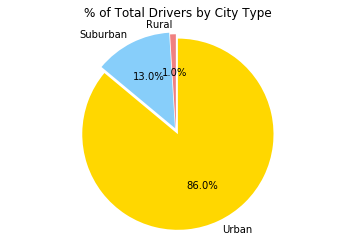

In [306]:
#% of Total Drivers by City Type
count_drivers = city_type_group['driver_count'].sum()

plt.title("% of Total Drivers by City Type")
plt.pie(count_drivers, explode=explode, labels=count_drivers.keys(), 
        colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

plt.show()

In [307]:
#Observable trends
# First: People in rural and suburban areas pay higher fares than people in urban areas. 
# Presumably, this would be because of distance travelled - likely further distances than those in urban areas.
# Second: There is a higher demand for rides the closer you get to the urban center.
# Third: Logically, there is a much higher concentration of drivers in urban areas.
# Fourth: The higher the demand for rides, the lower the cost per ride.